# Ionospheric Refraction Part 1

## Snell's Law

As we all know from looking at water in a glass, lights bends when passing from one medium to another. We call this phenomenon *refraction*, and in the simple case illustrated below, it can be modeled with [*Snell's Law*](https://en.wikipedia.org/wiki/Snell%27s_law)

$$ n_1 \sin(\theta_1) = n_2 \sin(\theta_2)$$
$$ v_2 \sin(\theta_1) = v_1 \sin(\theta_2)$$

![snells_law_diagram](../media/snells_law.png)

where $\theta_1$ is the angle at which the light impinges on the boundary, $\theta_2$ is the angle at which the light refracts, $v_1$ and $v_2$ are the velocities of the light, and $n_1$ and $n_2$ are the *refractive indicies* of the two media.

Consider the limit case of this equation: when $\theta_1 = 0$,  we know $\sin(\theta_2)$ must be $0$, limiting $\theta_2$ to be either $0^\circ$ or $180^\circ$: it either continues straight through without bending or reflects back at the source, which we call [total internal reflection](https://en.wikipedia.org/wiki/Total_internal_reflection). You can (carefully) verify the first case with a laser pointer and a glass of water, and the second case with a mirror

## Plasma Frequency

The [ionosphere](https://en.wikipedia.org/wiki/Ionosphere) is a layer of Earth's atmosphere between 60 km and 1,000 km above the surface that is ionized by solar and cosmic radiation. The resulting ionized gas is called a [plasma](https://en.wikipedia.org/wiki/Plasma_(physics), and like water, it can refract light. While these ions have negligible effect on visible light, they strongly affect the RF spectrum, and are exploited by many communications and radar systems in the [HF band](https://en.wikipedia.org/wiki/High_frequency).

The index of refraction of plasma is a function of its electron density ($C \, m^{-3}$) and depends on the frequency of the light passing through it. It can be expressed via the following formula

$$n_{\text{plasma}} = \sqrt{1 - \frac{N e^2}{\pi m_e \varepsilon_0 f}}$$

where $N$ is the number of electrons per $m^3$, $e$ is the elementary charge, $m_e$ is the electron mass, $\varepsilon_0$ is the permittivity of free space, and $f$ is the frequency of the light passing through.

Again consider the limit case of this equation: when $f = \sqrt{\frac{N e^2}{\pi m_e \varepsilon_0}}$, we get $n_{\text{plasma}} = \sqrt{1 - 1} = 0$. When light of that frequency impinges on a plasma of that charge density, we get total internal reflection. This frequency is known as the [plasma frequency](https://en.wikipedia.org/wiki/Critical_frequency#Relationship_with_Plasma_Frequency) and is denoted

$$f_p = \sqrt{\frac{N e^2}{\pi m_e \varepsilon_0}}$$

## Anisotropic Ionosphere

Snell's law is useful for modeling the refraction of light at the boundary of media with uniform indices of refraction. However, charge density is not uniform throughout space in the ionosphere: we say that it is [anisotropic](https://en.wikipedia.org/wiki/Anisotropy). Furthermore, it varies over time on the scale of hours, and changes rapidly when the sun rises and sets.

Despite these complexities, ionospheric charge density is usually modeled as strictly a function of altitude, where different models are used for different times of day and different regions of the world. These coarse models are often good enough to make meaningful predictions and engineering decisions about RF systems.

## Iospheric Charge Density Data

The following is real data from an ionospheric measurement device that has been pre-processed to estimate ionospheric charge density as a function of altitude above Moscow around noon, January 26th, 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../data/ukssd/NHPC_Profiles-20190126120000-30611') as fi:
    hli = 0    # header line index
    rep = []
    loc_name = ''
    loc_id = ''
    date = ''
    time = ''
    
    for line in fi:
        if hli == 0:
            [loc_name, loc_id, date, time] = line.split()
            loc_id = loc_id[1:-2]
            hli = 1
            continue
            
        elif hli < 4:
            hli += 1
            continue
        
        elif line == '===\n':
            ofn = '../data/processed/' + loc_id + '_' + date + '_' + time + '.csv'
            if len(rep) > 0 and rep[0] != '\n':
                with open(ofn, 'w') as fo:
                    fo.write('Height,Frequency,Density\n')
                    for ol in rep:
                        op = ''
                        for os in ol.split():
                            op += os + ','
                        fo.write(op[0:-1] + '\n')
            hli = 0
            rep.clear()
        else:
            rep.append(line)

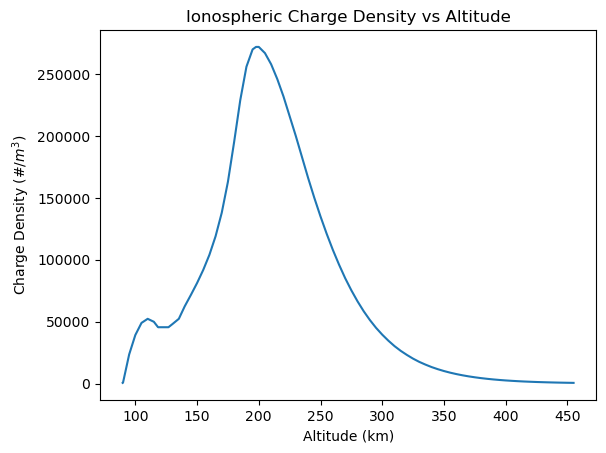

In [3]:
df = pd.read_csv('../data/processed/mo155_2019-01-26_12:01:00.csv')
plt.plot(df['Height'],df['Density'])
plt.xlabel("Altitude (km)")
plt.ylabel("Charge Density ($\# / m^3$)")
plt.title("Ionospheric Charge Density vs Altitude")
plt.show()

# Exercises

1. Imagine a 10 MHz radio wave travels through a vacuum until it impinges on a plasma with density 100,000 electrons per cubic meter at an angle of 15 degrees. In what direction will the radio wave travel after it hits the plasma?
  - 1 MHz?
  - 1 GHz?

2. Imagine an LFM radar on Earth looking straight up at the sky. This is called a vertical incidence [ionosonde](https://en.wikipedia.org/wiki/Ionosonde). Assuming that charge density is only a function of altitude:
  - Qualitatively, how can this system measure the ionosphere's charge density?
  - How do the LFM parameters ($m$ and $b$) affect the range of ionospheric conditions that this system can measure?
  - Simulate an LFM observing an ionosphere with the charge density profile given by `df['Height']` and `df['Density']` above. Choose $m$ and $b$ wisely.
  - Hint: You need to to compute more than 1 FFT. Think back to the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) and the 3rd notebook.